# HECRAS Example Culvert Models

I setup a few hecras models to understand what will impact the headwater water surface.

As explained in the [theory notebook](https://github.com/mel-meng/SewerAnalysis/blob/master/examples/culvert/hec-ras%20culvert.ipynb), the culvert has,
- 4 cross sections
- culvert setup
- inflow and boundary condition

So I would like to see how much each parameters play into the results.

I then run a subcritical steady state run, and get the results.

TODO: what is the subcritical run for?



## DG 1.3.1

I setup a HECRAS model for HDS design example 1.3.1, it can be found at : **./data/dj131.prj**.

Comparing with HY8, setting up a HECRAS model takes a lot more effort.

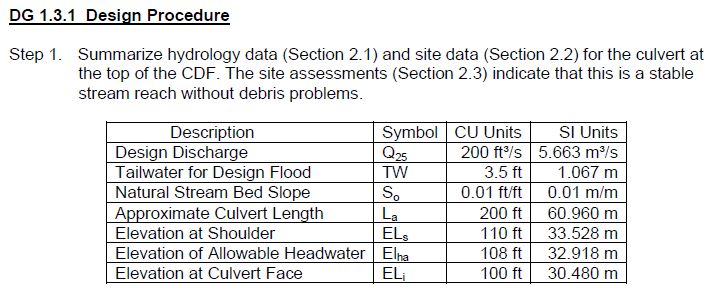

 

### Cross Sections

It will take 4 cross sections to setup a culvert. 
- the upstream
- upstream face 5ft, ineffective area 1:1 contraction.
- the culvert
- downstream face 5ft, ineffective area 1.5: 1 expansion
- downstream end 


I need to setup the upstream/downstream channels much wider than the culvert like in typical settings, otherwise entrance/exit, expansion/contraction loss can be exaggerated due to the high velocity.

I need to do some sensitivy analysis on the following, 
- distance to the culvert for upstream/downstream face cross sections.
- cross section areas of the cross sections


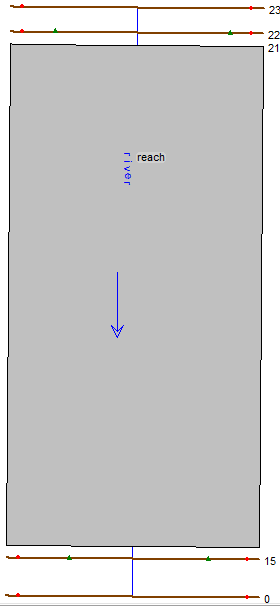


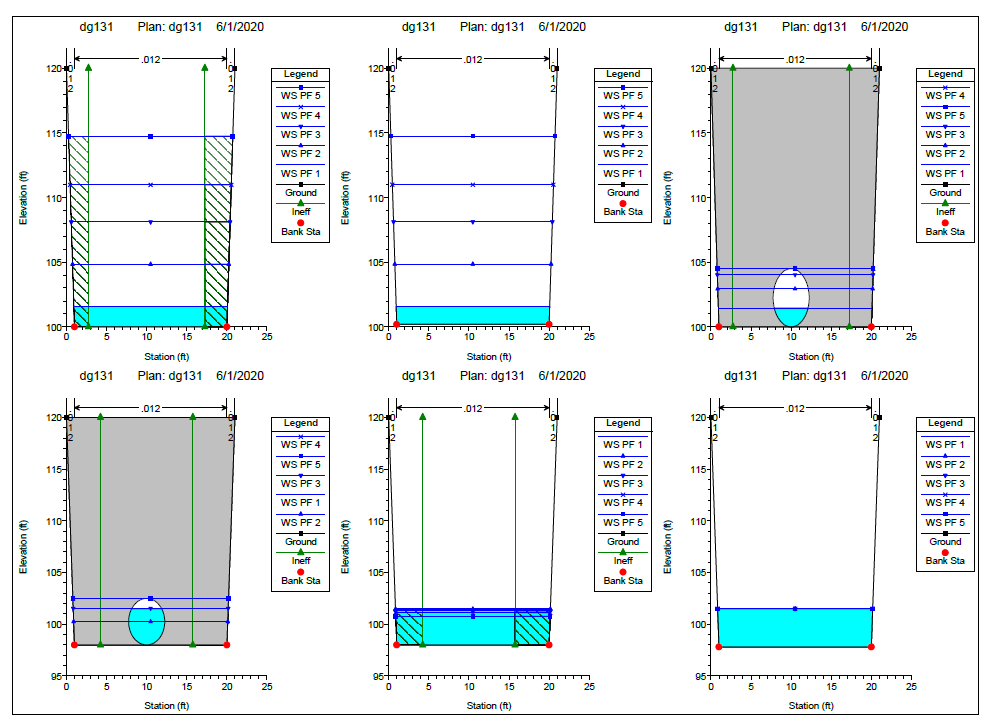

## Culvert Settings

There is not too much amibguity for culvert parameters, they are the same as HY8.

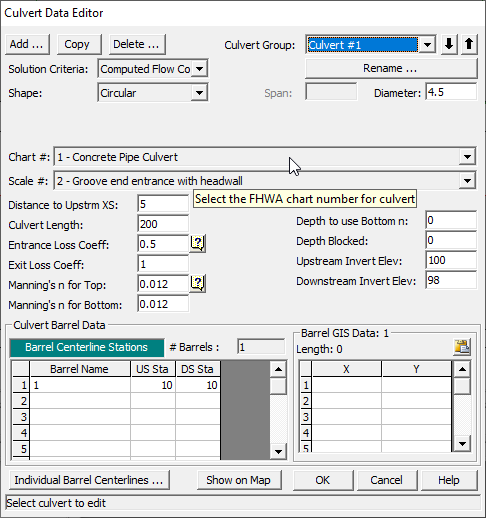

# Sensitity Analysis

I need to see how much the head water water surface will change while I am varying the following parameters

- FD: Distance to the culvert for upstream/downstream face cross sections
- Area: areas of the cross sections


Ranges:
- FD: 1, 5, 25ft from the face (FD1, FD5, FD25)
- Area: 10, 50, 100ft wide cross sections (A10, A50, A100)

The base scenario uses FD5 and A100.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sensitivity(df, x_field, base_field, x_label='x', y_label='y', title='title'):
   
    styles = ['x', '.', 'o']
    ax = None
    for i, fld in enumerate(df.columns):
        if fld == x_field:
            pass
        else:
            if ax is None:
                ax = df.plot(x=x_field, y=fld, label=fld, style='%s-' % (styles[i % 3]), figsize=(10,10))
            else:
                ax = df.plot(x=x_field, y=fld, label=fld, style='%s-' % (styles[i % 3]), ax=ax)
    ax.fill_between(df[x_field], df[base_field]*0.9, df[base_field]*1.1, alpha=0.2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

The results are saved at: **SewerAnalysis\examples\culvert\data\dg131_hecras.csv**. You will need to change the path below to get it to work.

     q   BASE    FD5   FD10    A10    A50
0   10   1.57   1.57   1.57   1.56   1.57
1  100   4.83   4.83   4.83   4.78   4.86
2  200   8.11   8.11   8.11   8.04   8.15
3  250  10.98  10.98  10.98  10.92  11.01
4  300  14.73  14.73  14.73  14.69  14.76


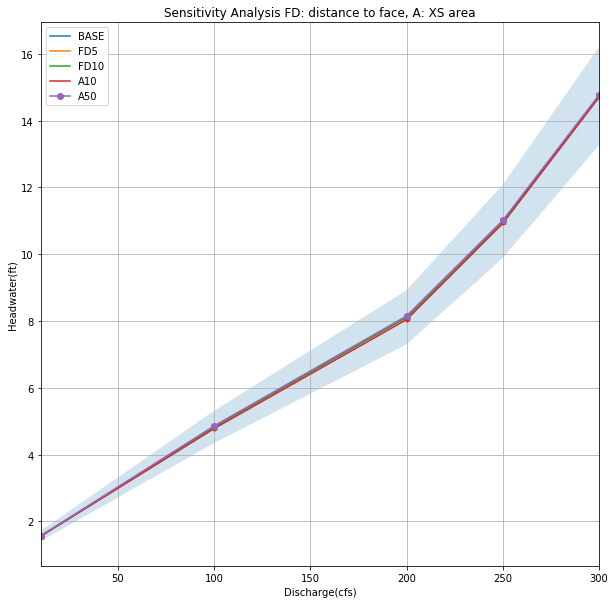

In [27]:
f = r"C:\Users\Mel.Meng\Documents\GitHub\SewerAnalysis\examples\culvert\data\dg131_hecras.csv"
df = pd.read_csv(f)

# set to depth instead of elevation
for fld in df.columns:
    if fld=='q':
        pass
    else:
        df[fld] = df[fld] - 100
        
print(df)
plot_sensitivity(df, x_field='q', base_field='BASE', x_label='Discharge(cfs)', y_label='Headwater(ft)', title='Sensitivity Analysis FD: distance to face, A: XS area')

# Conclusion

For this problem, none of the parameters seems to matter too much for the results.